# Modelling Predator-Prey Systems with differential equations

In this notebook we will look at a mathematical model used to computationally simulate predator-prey systems. The model we will look at is known as the __Lotka-Volterra__ model.

We will do this by first building a deterministic, idealized model for the predator-prey systems. Towards the end of the notebook, we will then introduce __stochasticity__ into the equations - so that the model more accurately captures the noise found in real world scenarios. 


## The Lotka-Volterra Equations
The Lotka-Volterra equations are a pair of first-order, nonlinear, differential equations that are used routinely to describe the __dynamics__ of __biological systems__ in which __two species interact__, one as the __prey__ and the other as the __predator__.

The equations are given as shown:
![](./images/lv.svg)

### Defining the equations

From the above equation, the parameters can be thought of as the following:

* $\large t$ = time
* $\large x$ = population of preys (rabbits) 
* $\large y$ = population of predators (foxes)

* $\large \frac{dx}{dt}$ = growth rate of rabbit population
* $\large \frac{dy}{dt}$ = growth rate of fox population

* $\large \alpha$ = reproduction rate of rabbits (i.e. number of offsprings per rabbit)
* $\large \beta$ = death rate of rabbits due to predatation from foxes (interaction term between predators and prey)
* $\large \gamma$ = natural death rate of foxes
* $\large \delta$ = factor describing how many consumed rabbits create a new fox (interaction term between prey and predators)

### Physical Meaning of the Equations and Main Assumptions of the Model

From the above equations, we can conclude that the Lotka-Volterra model makes several simplifying assumptions for the dynamics of predator-prey systems. Some of which are as follows:

* The prey population never runs out of food.
* The predators consume only the prey.
* The rate of change of populations are proportional to their size.
* The environment does not change in favour of one species, and genetic adaptation of offspring is negligible.
* Predators have limitless appetite.

# Modelling Stochasticisty

In introducing stochasticity to our models, there are numerous ways that we can choose to model __randomness__. In this notebook, we will model noise using a very simple uniform distribution with a mean about zero.

# Deterministic Lotka-Volterra Model

Here we will simulate the behaviour of rabbit and fox populations using the deterministic Lotka-Volterra model, without any stochastic noise added to the simulation. Don't worry too much about the details of the code. Focus on the big picture, the ability of the code to simulate the dynamics of the population.

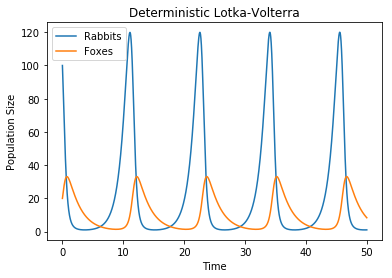

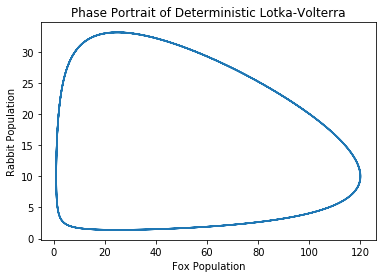

In [1]:
%matplotlib inline
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as npy
import random

# timestep (step size) determines the accuracy of the euler method of integration
timestep = 0.0001
# amplitude of noise term
amp = 0.00
# the time at which the simulation ends
end_time = 50

# creates a time vector from 0 to end_time, seperated by a timestep
t = npy.arange(0,end_time,timestep)

# intialize rabbits (x) and foxes (y) vectors
x = []
y = []

# noise term to perturb differential equations
def StochasticTerm(amp):
    return (amp * random.uniform(-1,1))

"""" definition of lotka-volterra parameters"""
# birth rate of rabbits
a = 1
# death rate of rabbits due to predation
b = 0.1
# natural death rate of foxes
c = 0.5
# factor that describes how many eaten rabbits give birth to a new fox
d = 0.02

""" euler integration """

# initial conditions for the rabbit (x) and fox (y) populations at time=0
x.append(100)
y.append(20)

# forward euler method of integration
# a perturbbation term is added to the differentials to make the simulation stochastic
for index in range(1,len(t)):
    
   
    # evaluate the current differentials
    xd = x[index-1] * (a - b*y[index-1])
    yd = -y[index-1]*(c - d*x[index-1])
    
    # evaluate the next value of x and y using differentials
    next_x = x[index-1] + xd * timestep
    next_y = y[index-1] + yd * timestep

    # add the next value of x and y 
    x.append(next_x)
    y.append(next_y)

""" visualization """

# visualization of deterministic populations against time
plt.plot(t, x)
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(('Rabbits', 'Foxes'))
plt.title('Deterministic Lotka-Volterra')
plt.show()

# deterministic phase portrait
plt.plot(x,y)
plt.xlabel('Fox Population')
plt.ylabel('Rabbit Population')
plt.title('Phase Portrait of Deterministic Lotka-Volterra')
plt.show()

## Discussion

From the first graph, we observe an oscillatory relationship between the rabbits and the foxes. As the rabbit population grows in size, the foxes have more to eat. This creates more foxes. As there are now more foxes, they more rapidly consume the rabbit population. As the rabbit population is depleted by the large number of foxes, the foxes have less to eat and are therefore depleted as well.

From the second graph, we observe a closed loop for the phase portrait. This demonstrates the __stability__ of these differential equations over time. 

### Errors in the Simulation

Numerical errors can creep in our numerical simulation due to the integration method chosen for evaluating the rabbit and fox populations.  The numerical integration method chosen was the Euler method. Inherrent errors within this method include the stepsize chosen, which contributes to a discretization error, and any rounding errors. The dominant potential error in our program is the discretization error, which can be minimized by decreasing the step-size. It is worth noting that when the step-size is larger, the closed-loop observed becomes a spiral, and the populations diverge. This illustrates that the equations are mathematically "__unstable__". Try the value 0.1 for the parameter `timestep` in the code snippet above.

# Applying noise to the Lotka-Volterra Parameters

Here, we apply noise to the birth rate of rabbits. That is, noise is specifically applied to the parameter $\alpha$ (variable `a` in the code) in the lotka-volterra equations.

## Stochastic Birth Rate

Here, the value of the birth rate $a$ is defined to be stochastic in the integration.

We define $a$ as follows:

$a = a + StochasticTerm$

Therefore, the value of a has a mean about the deterministic value of $a$, but it has an added noise to it that varies proportionally with the birth rate.

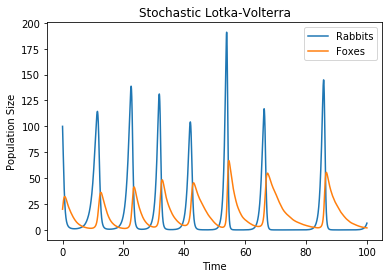

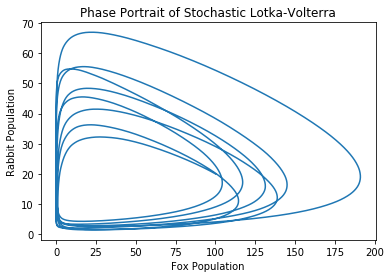

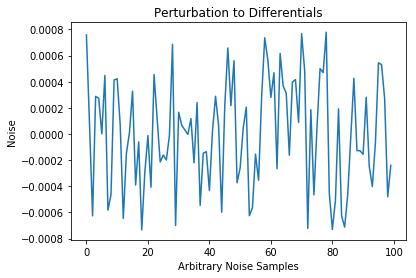

In [2]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as npy
import random

# timestep determines the accuracy of the euler method of integration
timestep = 0.0001
# amplitude of noise term
amp = 0.0008
# the time at which the simulation ends
end_time = 100

# creates a time vector from 0 to end_time, seperated by a timestep
t = npy.arange(0,end_time,timestep)

# intialize rabbits (x) and foxes (y) vectors
x = []
y = []

# noise term to perturb differential equations
def StochasticTerm(amp):
    return (amp * random.uniform(-1,1))

"""" definition of lotka-volterra parameters"""
# birth rate of rabbits
a = 1
# death rate of rabbits due to predation
b = 0.1
# natural death rate of foxes
c = 0.5
# factor that describes how many eaten rabbits give birth to a new fox
d = 0.02

""" euler integration """

# initial conditions for the rabbit (x) and fox (y) populations at time=0
x.append(100)
y.append(20) 

# forward euler method of integration
# a perturbbation term is added to the differentials to make the simulation stochastic
for index in range(1,len(t)):
    
    # make parameters stochastic
    a = a + StochasticTerm(amp)
#     b = b + StochasticTerm(amp)
    c = c + StochasticTerm(amp)
#     d = d + StochasticTerm(amp)
    
    # evaluate the current differentials
    xd = x[index-1] * (a - b*y[index-1])
    yd = -y[index-1]*(c - d*x[index-1])
    
    # evaluate the next value of x and y using differentials
    next_x = x[index-1] + xd * timestep
    next_y = y[index-1] + yd * timestep

    # add the next value of x and y 
    # add noise to x and y
    x.append(next_x)
    y.append(next_y)

""" visualization """

# visualization of stochastic populations against time
plt.plot(t, x)
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(('Rabbits', 'Foxes'))
plt.title('Stochastic Lotka-Volterra')
plt.show()

# stochastic phase portrait
plt.plot(x,y)
plt.xlabel('Fox Population')
plt.ylabel('Rabbit Population')
plt.title('Phase Portrait of Stochastic Lotka-Volterra')
plt.show()

# noise term visualization
noise = []
n =[]
for sample in range(100):
    noise.append(StochasticTerm(amp))
    n.append(sample)

plt.plot(n, noise)
plt.xlabel('Arbitrary Noise Samples')
plt.ylabel('Noise')
plt.title('Perturbation to Differentials')
plt.show()

Run the model several times and notice how the stochasticity introduced produces different time trajectories for each simulation.

## Comparison of Model with Empirical Evidence

Here is a graph of an empirically recorded predator-prey system in the real world. The figure below shows the population oscillations of the Canadian lynx and the snowshoe hare from records collected by the Hudson Bay Company over almost a century.

![](./images/lynxhare.gif)

We observe stochasticisty in the discrete data points collected, and a oscillatory relationship between the populations of the two species. This is in agreement with the Lotka-Volterra models constructed above. So the model above does a decent job at describing (i.e. simulating) a real physical phenomena.

## Conclusions

In this notebook we have discussed the Lotka-Volterra model for the dynamics of predator-prey systems. We created a model which illustrated the oscilatory relationship between the populations. The obtained results agree with the oscilatory relationship found in nature, as illustrated by the empircal evidence above.

#### References

- [https://github.com/INASIC/predator-prey_systems/blob/master/Modelling%20Predator-Prey%20Systems%20in%20Python.ipynb](https://github.com/INASIC/predator-prey_systems/blob/master/Modelling%20Predator-Prey%20Systems%20in%20Python.ipynb)